In [158]:
import sys

import numpy as np

from evo.tools import file_interface
from evo.core import sync

import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)


SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

In [159]:
seq = 11
# save_filename = f'pngs/{seq}/{model}.png'
ref_file = f"../../trajectory-cvt/trajectories/transformed/{seq}_gt.txt"

est_file_g = f"../../trajectory-cvt/trajectories/processed/{seq}/{seq}_gan.txt"
est_file_o = f"../../trajectory-cvt/trajectories/processed/{seq}/{seq}_orig.txt"
est_file_h = f"../../trajectory-cvt/trajectories/processed/{seq}/{seq}_hist.txt"
est_file_g2 = f"../../trajectory-cvt/trajectories/processed/{seq}/{seq}_gamma2.txt"
est_file_g4 = f"../../trajectory-cvt/trajectories/processed/{seq}/{seq}_gamma4.txt"


traj_ref = file_interface.read_tum_trajectory_file(ref_file)

traj_est_g = file_interface.read_tum_trajectory_file(est_file_g)
traj_est_o = file_interface.read_tum_trajectory_file(est_file_o)
traj_est_h = file_interface.read_tum_trajectory_file(est_file_h)
traj_est_g2 = file_interface.read_tum_trajectory_file(est_file_g2)
traj_est_g4 = file_interface.read_tum_trajectory_file(est_file_g4)

traj_ref, traj_est_g = sync.associate_trajectories(traj_ref, traj_est_g, 0.8)

traj_list = [traj_ref, traj_est_g, traj_est_o, traj_est_h, traj_est_g2, traj_est_g4]
# plt.plot(tra)


# plt.show()
# plt.savefig(save_filename)

In [160]:
for t in traj_list:
    print(t.positions_xyz.shape)

(1075, 3)
(1075, 3)
(1075, 3)
(1075, 3)
(1101, 3)
(1075, 3)


In [161]:
traj = {}
# traj['gt'] = np.array([traj_ref.positions_xyz[:, 0], traj_ref.positions_xyz[:, 1], traj_ref.positions_xyz[:, 2]]).T
method_name = ["gt", "gan", "orig", "hist", "gamma2", "gamma4"]
rm = 10
for i, t in enumerate(traj_list):
    x = running_mean(t.positions_xyz[:, 0], rm)
    y = running_mean(t.positions_xyz[:, 1], rm)
    z = running_mean(t.positions_xyz[:, 2], rm)
    traj[method_name[i]] = np.array([x, y, z]).T

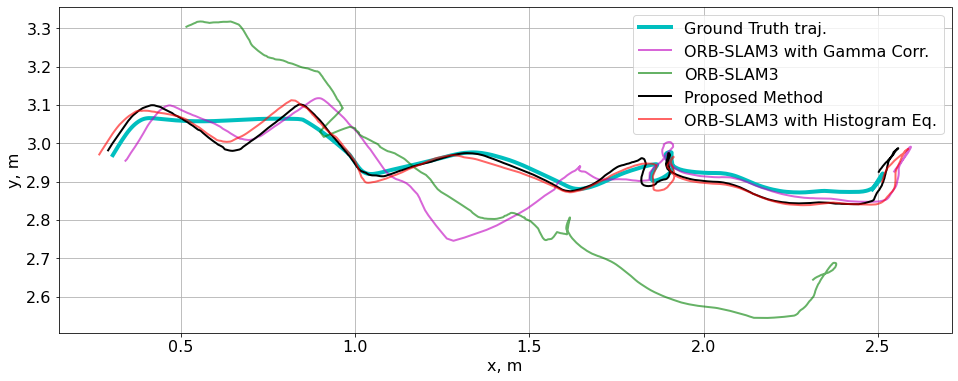

In [162]:
fig, ax = plt.subplots(figsize=(16, 6))
lw = 2
a = 0.8

n = 100
m = 700
# N = 0
# M = -1

# N = np.argmin(np.linalg.norm(traj_ref.positions_xyz - traj_est_h.positions_xyz[n], axis=1))
# M = np.argmin(np.linalg.norm(traj_ref.positions_xyz - traj_est_h.positions_xyz[m], axis=1))

N = n
M = m

# ax.plot(traj_ref.positions_xyz[N:M, 0], traj_ref.positions_xyz[N:M, 2], linewidth=lw+1, alpha=a)
# ax.plot(traj_est_g.positions_xyz[n:m, 0], traj_est_g.positions_xyz[n:m, 2], linewidth=lw, alpha=a)
# ax.plot(traj_est_o.positions_xyz[n:m, 0], traj_est_o.positions_xyz[n:m, 2], linewidth=lw, alpha=a)
# ax.plot(traj_est_h.positions_xyz[n:m, 0], traj_est_h.positions_xyz[n:m, 2], linewidth=lw, alpha=a)
# ax.plot(traj_est_g2.positions_xyz[n:m, 0], traj_est_g2.positions_xyz[n:m, 2], linewidth=lw, alpha=a)

lw = [4, 2, 2, 2, 2]
a = [1, 0.6, 0.6, 1, 0.6]
c = 'cmgkr'
for i, k in enumerate(traj.keys()):
    if k == "gamma4":
        pass
    else:
        ax.plot(traj[k][n:m, 0], traj[k][n:m, 2], linewidth=lw[i], alpha=a[i], color=c[i])    
            
# for k in traj.keys():
#     ax.plot(traj[k][n:m, 0], traj[k][n:m, 2], linewidth=lw, alpha=a)


ax.legend(["Ground Truth traj.", "ORB-SLAM3 with Gamma Corr.", "ORB-SLAM3", "Proposed Method", "ORB-SLAM3 with Histogram Eq."])
ax.grid()
ax.set_xlabel("x, m")
ax.set_ylabel("y, m")
# ax.set_xlim([2, 3.5])
plt.show()
fig.savefig("../images/trajectories.png")

In [163]:
print(N, M)

100 700


In [87]:
traj[k].shape

(1071, 3)

##### 

In [49]:
traj_ref.positions_xyz[np.where(traj_ref.positions_xyz[:, 0] > 1.2)]
traj_ref.positions_xyz[np.where(traj_ref.positions_xyz[:, 0] < 2.6)]
traj_ref.positions_xyz.shape

(9993, 3)